In [2]:
# LINEAR REGRESSION

In [33]:
import torch
import torch.nn as nn
import torch.optim as optim
import pandas as pd 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [34]:
df = pd.read_csv("C:\\Users\\nagin\\Downloads\\wine.csv")

In [35]:
df

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,white,7.0,0.270,0.36,20.7,0.045,45.0,170.0,1.00100,3.00,0.45,8.8,6
1,white,6.3,0.300,0.34,1.6,0.049,14.0,132.0,0.99400,3.30,0.49,9.5,6
2,white,8.1,0.280,0.40,6.9,0.050,30.0,97.0,0.99510,3.26,0.44,10.1,6
3,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
4,white,7.2,0.230,0.32,8.5,0.058,47.0,186.0,0.99560,3.19,0.40,9.9,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,red,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
6493,red,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
6494,red,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
6495,red,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


In [36]:
df.drop_duplicates(inplace=True)

In [37]:
id2label = {0:"white", 1:"red"}
label2id = {"white":0, "red":1}

In [38]:
df['type'] = df['type'].map(label2id)

In [39]:
df.head(5)

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [40]:
X = df.drop(["quality"], axis=1)
y = df["quality"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train_tensor = torch.tensor(X_train.to_numpy(), dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.float32).view(-1, 1)
X_test_tensor = torch.tensor(X_test.to_numpy(), dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.to_numpy(), dtype=torch.float32).view(-1, 1)

In [45]:
class LinearRegressionModel(nn.Module):
    def __init__(self, input_dim):
        super(LinearRegressionModel, self).__init__()
        self.linear = nn.Linear(input_dim, 1)
        
    def forward(self, x):
        return self.linear(x)

In [51]:
input_dim = X_train.shape[1]
model = LinearRegressionModel(input_dim)

criterion = nn.MSELoss()
optimizer = optim.SGD(model.parameters(), lr=0.000053)

In [52]:
num_epochs = 500
train_losses = []
for epoch in range(num_epochs):
    model.train()
    
    outputs = model(X_train_tensor)
    loss = criterion(outputs, y_train_tensor)
    
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_losses.append(loss.item())
    
    if (epoch+1) % 10 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

Epoch [10/500], Loss: 59.2290
Epoch [20/500], Loss: 12.5206
Epoch [30/500], Loss: 9.2263
Epoch [40/500], Loss: 8.4082
Epoch [50/500], Loss: 7.7815
Epoch [60/500], Loss: 7.2141
Epoch [70/500], Loss: 6.6945
Epoch [80/500], Loss: 6.2180
Epoch [90/500], Loss: 5.7810
Epoch [100/500], Loss: 5.3801
Epoch [110/500], Loss: 5.0123
Epoch [120/500], Loss: 4.6747
Epoch [130/500], Loss: 4.3649
Epoch [140/500], Loss: 4.0805
Epoch [150/500], Loss: 3.8193
Epoch [160/500], Loss: 3.5796
Epoch [170/500], Loss: 3.3594
Epoch [180/500], Loss: 3.1573
Epoch [190/500], Loss: 2.9716
Epoch [200/500], Loss: 2.8011
Epoch [210/500], Loss: 2.6444
Epoch [220/500], Loss: 2.5006
Epoch [230/500], Loss: 2.3684
Epoch [240/500], Loss: 2.2469
Epoch [250/500], Loss: 2.1353
Epoch [260/500], Loss: 2.0328
Epoch [270/500], Loss: 1.9385
Epoch [280/500], Loss: 1.8519
Epoch [290/500], Loss: 1.7722
Epoch [300/500], Loss: 1.6990
Epoch [310/500], Loss: 1.6317
Epoch [320/500], Loss: 1.5698
Epoch [330/500], Loss: 1.5128
Epoch [340/500], 

In [79]:
model.eval()
with torch.no_grad():
    predictions = model(X_test_tensor)
    test_loss = criterion(predictions, y_test_tensor)
    print(f'Test Loss: {test_loss.item():.4f}')

Test Loss: 0.5748


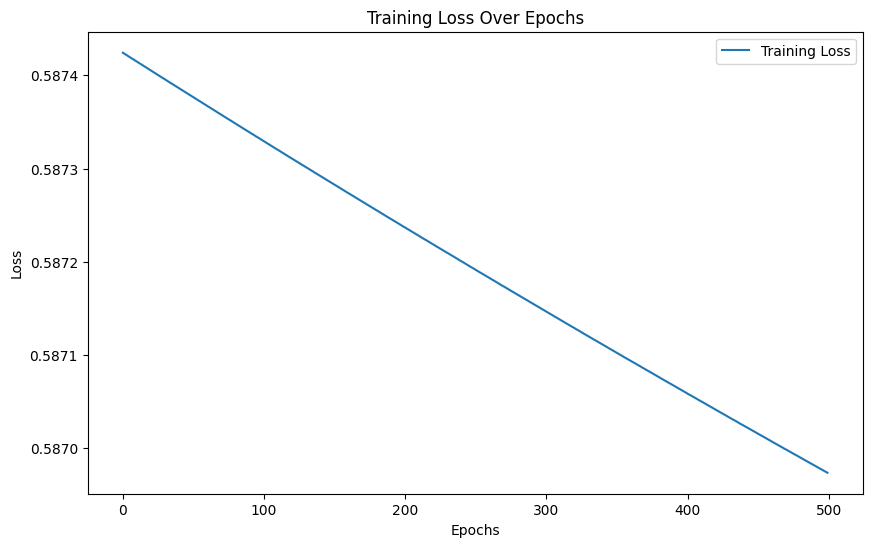

In [80]:
plt.figure(figsize=(10, 6))
plt.plot(range(num_epochs), train_losses, label='Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Over Epochs')
plt.legend()
plt.show()

In [139]:
import torch

test_sample = ["white", 6.4, 0.22, 0.31, 13.9, 0.04, 57.0, 135.0, 0.99672, 3.21, 0.38, 10.7]
test_sample[0] = float(label2id[test_sample[0]])

model.eval()

with torch.no_grad():
    predictions = model(torch.tensor(test_sample, dtype=torch.float32))

predictions_rounded = predictions.round()
predictions_np_int = predictions_rounded.numpy().astype(int)

print(f"Prediction : {predictions_np_int[0]}")

Prediction : 6


In [1]:
# BINARY CLASSIFICATION 

In [3]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv("C:\\Users\\nagin\\Downloads\\mushroom.csv")

In [5]:
df.drop_duplicates(inplace=True)

In [55]:
df.head()

,type,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,0,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,0,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,0,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
6,0,6.2,0.32,0.16,7.0,0.045,30.0,136.0,0.9949,3.18,0.47,9.6,6


In [7]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X = df.drop(["class"], axis=1)
y = df["class"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32).to(device)
X_test= torch.tensor(X_test.to_numpy(), dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.float32).unsqueeze(1).to(device)
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.float32).unsqueeze(1).to(device)

In [8]:
class MushroomClassifier(nn.Module):
    def __init__(self, input_dim):
        super(MushroomClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 1)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        # aktivasiya  funksiyasidi - binary classificartionda istifade olunur 
        x = torch.sigmoid(self.fc3(x))
        return x

input_dim = X_train.shape[1]
model = MushroomClassifier(input_dim).to(device)

In [9]:
criterion = nn.BCELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 50
batch_size = 32
num_batches = len(X_train) // batch_size

losses = []

model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        inputs = X_train[start_idx:end_idx]
        labels = y_train[start_idx:end_idx]
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    epoch_loss = running_loss / num_batches
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')

Epoch 1/50, Loss: 2.9704919715515286
Epoch 2/50, Loss: 0.7337747425928279
Epoch 3/50, Loss: 0.6713691231748193
Epoch 4/50, Loss: 0.6482375854444611
Epoch 5/50, Loss: 0.6309794201969834
Epoch 6/50, Loss: 0.6121330237042434
Epoch 7/50, Loss: 0.5885095553707029
Epoch 8/50, Loss: 0.5709410903397019
Epoch 9/50, Loss: 0.5540663522521861
Epoch 10/50, Loss: 0.5441191828437288
Epoch 11/50, Loss: 0.5323920991557441
Epoch 12/50, Loss: 0.5192580372982742
Epoch 13/50, Loss: 0.508948918029788
Epoch 14/50, Loss: 0.4921946954633971
Epoch 15/50, Loss: 0.48165242421653676
Epoch 16/50, Loss: 0.47267308999865426
Epoch 17/50, Loss: 0.46071172086764695
Epoch 18/50, Loss: 0.45225712650317534
Epoch 19/50, Loss: 0.449634604083897
Epoch 20/50, Loss: 0.4461615226846618
Epoch 21/50, Loss: 0.43725576031500957
Epoch 22/50, Loss: 0.4338526034079997
Epoch 23/50, Loss: 0.42631041033891093
Epoch 24/50, Loss: 0.42235383106227786
Epoch 25/50, Loss: 0.41584274707582575
Epoch 26/50, Loss: 0.4160458356785579
Epoch 27/50, Lo

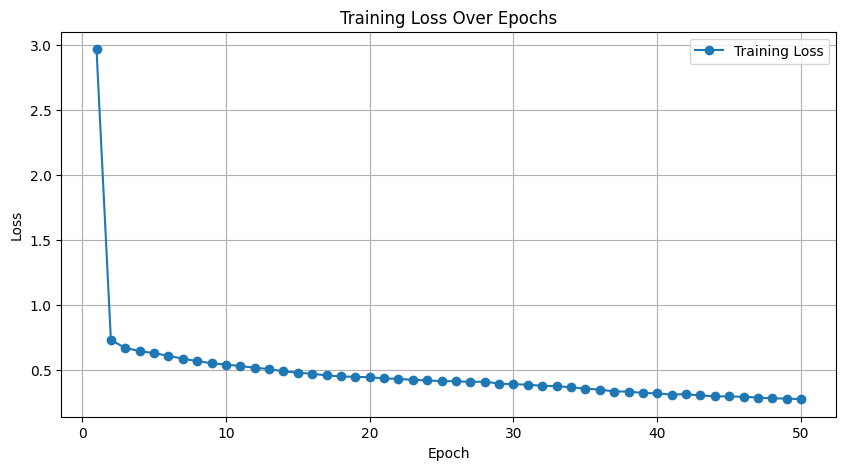

In [10]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), losses, marker='o', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [11]:
model.eval()

sample_data = [235.0, 3.0, 3.0, 2.0, 2.0137941195617053, 0.0, 2.0, 1.804272708628173]
sample_data_tensor = torch.tensor(sample_data, dtype=torch.float32).to(device)

with torch.no_grad():
    predictions = model(sample_data_tensor.unsqueeze(0)) 

predicted_class = (predictions > 0.5).item()

print("Prediction (probability):", predictions.item())
print("Predicted class:", predicted_class)

Prediction (probability): 1.0
Predicted class: True


In [1]:
# MULTICLASS CLASSIFICATION

In [61]:
import pandas as pd
from sklearn.model_selection import train_test_split
import torch 
import torch.nn as nn 
import torch.optim as optim
import torch.nn.functional as F
import matplotlib.pyplot as plt

In [62]:
df = pd.read_csv("C:\\Users\\nagin\\Downloads\\glass.csv")

In [63]:
df.drop_duplicates(inplace=True)
df.dropna(inplace=True)

In [64]:
df.drop(["Unnamed: 0.1", "Unnamed: 0"], inplace=True, axis=1)

In [65]:
index = 0
label2id = {}
id2label = {}
for glass in list(df["Type"].unique()):
    label2id[glass.replace("'", "")] = index
    id2label[index] = glass.replace("'", "")
    index = index + 1

In [66]:
df["Type"] = df["Type"].map(label2id)

In [67]:
df.dropna(inplace=True)

In [68]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

X = df.drop(["Type"], axis=1)
y = df["Type"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train = torch.tensor(X_train.to_numpy(), dtype=torch.float32).to(device)
X_test= torch.tensor(X_test.to_numpy(), dtype=torch.float32).to(device)
y_train = torch.tensor(y_train.to_numpy(), dtype=torch.long).to(device) 
y_test = torch.tensor(y_test.to_numpy(), dtype=torch.long).to(device) 

In [69]:
class MushroomClassifier(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(MushroomClassifier, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, num_classes)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = F.log_softmax(self.fc3(x), dim=1)
        return x

input_dim = X_train.shape[1]
num_classes = 6
model = MushroomClassifier(input_dim, num_classes).to(device)

In [70]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

num_epochs = 20
batch_size = 32
num_batches = len(X_train) // batch_size

losses = []

model.train()
for epoch in range(num_epochs):
    running_loss = 0.0
    for i in range(num_batches):
        start_idx = i * batch_size
        end_idx = start_idx + batch_size
        inputs = X_train[start_idx:end_idx].to(device)
        labels = y_train[start_idx:end_idx].to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    if len(X_train) % batch_size != 0:
        start_idx = num_batches * batch_size
        inputs = X_train[start_idx:].to(device)
        labels = y_train[start_idx:].to(device)
        
        optimizer.zero_grad()
        
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * (len(X_train) % batch_size) / batch_size

    epoch_loss = running_loss / (num_batches + (1 if len(X_train) % batch_size != 0 else 0))
    losses.append(epoch_loss)
    print(f'Epoch {epoch+1}/{num_epochs}, Loss: {epoch_loss}')

Epoch 1/20, Loss: 0.30819674831716903
Epoch 2/20, Loss: 0.01330392622794308
Epoch 3/20, Loss: 0.0022611463041275807
Epoch 4/20, Loss: 0.0007495183419034599
Epoch 5/20, Loss: 0.00030433476079108103
Epoch 6/20, Loss: 0.00013505945542999627
Epoch 7/20, Loss: 6.419325685021207e-05
Epoch 8/20, Loss: 3.142451990865685e-05
Epoch 9/20, Loss: 1.5553562387478355e-05
Epoch 10/20, Loss: 7.818108475949879e-06
Epoch 11/20, Loss: 3.9925890599023805e-06
Epoch 12/20, Loss: 2.053577009912148e-06
Epoch 13/20, Loss: 1.062417134816047e-06
Epoch 14/20, Loss: 5.516487571312508e-07
Epoch 15/20, Loss: 2.8712809157950777e-07
Epoch 16/20, Loss: 1.4927332670601489e-07
Epoch 17/20, Loss: 7.681055772876395e-08
Epoch 18/20, Loss: 3.786580048010914e-08
Epoch 19/20, Loss: 1.74581070911734e-08
Epoch 20/20, Loss: 5.216044489409323e-09


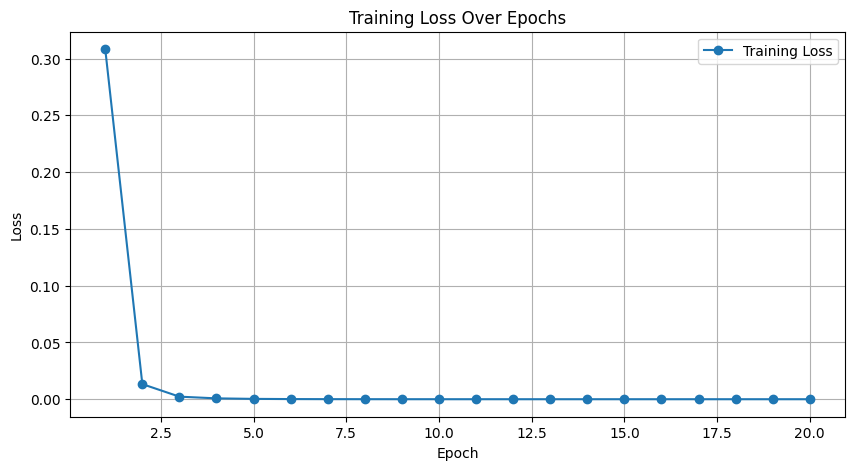

In [71]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs+1), losses, marker='o', label='Training Loss')
plt.title('Training Loss Over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid()
plt.show()

In [80]:
def predict(model, sample_data, device):
    model.eval()
    
    sample_data_tensor = torch.tensor(sample_data, dtype=torch.float32).to(device)
    
    with torch.no_grad():
        predictions = model(sample_data_tensor.unsqueeze(0))
        predicted_class = torch.argmax(predictions, dim=1).item()
        
    print("Prediction (logits):", predictions)
    print("Predicted class:", predicted_class)
    return predicted_class

sample_data = [1.51666, 12.86, 0.0, 1.83, 73.88, 0.97, 10.17, 0.0, 0.0]
predicted_class = predict(model, sample_data, device)

Prediction (logits): tensor([[-29.6324, -17.0574, -30.4732, -34.0712,   0.0000, -37.4387]],
       device='cuda:0')
Predicted class: 4


In [1]:
# IMAGE RECOGNITION 

In [10]:
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms, models
from torch.utils.data import DataLoader
import os
import warnings

warnings.filterwarnings("ignore")

In [11]:
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'valid': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'test': transforms.Compose([
        transforms.Resize(256),
        transforms.CenterCrop(224),
        transforms.ToTensor(),
        transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}

In [12]:
data_dir = "C:\\Users\\nagin\\Downloads\\Fruits Classification"

image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'valid', 'test']}

dataloaders = {x: DataLoader(image_datasets[x], batch_size=32, shuffle=True, num_workers=4)
               for x in ['train', 'valid', 'test']}

dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'valid', 'test']}
class_names = image_datasets['train'].classes

In [13]:
model = models.resnet18(pretrained=True)
num_ftrs = model.fc.in_features
model.fc = nn.Linear(num_ftrs, len(class_names))

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

In [14]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.001, momentum=0.9)

In [17]:
def train_model(model, criterion, optimizer, num_epochs=25):
    best_model_wts = model.state_dict()
    best_acc = 0.0

    for epoch in range(num_epochs):
        print(f'Epoch {epoch}/{num_epochs}')
        print('-' * 10)

        for phase in ['train', 'valid']:
            if phase == 'train':
                model.train()
            else:
                model.eval()

            running_loss = 0.0
            running_corrects = 0

            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                optimizer.zero_grad()

                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    loss = criterion(outputs, labels)

                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

            if phase == 'valid' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = model.state_dict()

    print(f'Best val Acc: {best_acc:4f}')

    model.load_state_dict(best_model_wts)
    return model

In [19]:
model = train_model(model, criterion, optimizer, num_epochs=3)

Epoch 0/2
----------
train Loss: 0.4020 Acc: 0.8578
valid Loss: 0.2270 Acc: 0.9200
Epoch 1/2
----------
train Loss: 0.3469 Acc: 0.8791
valid Loss: 0.1603 Acc: 0.9350
Epoch 2/2
----------
train Loss: 0.3296 Acc: 0.8797
valid Loss: 0.1468 Acc: 0.9600
Best val Acc: 0.960000


In [20]:
model.eval()
running_corrects = 0

for inputs, labels in dataloaders['test']:
    inputs = inputs.to(device)
    labels = labels.to(device)
    outputs = model(inputs)
    _, preds = torch.max(outputs, 1)
    running_corrects += torch.sum(preds == labels.data)

test_acc = running_corrects.double() / dataset_sizes['test']
print(f'Test Acc: {test_acc:.4f}')

Test Acc: 0.9600


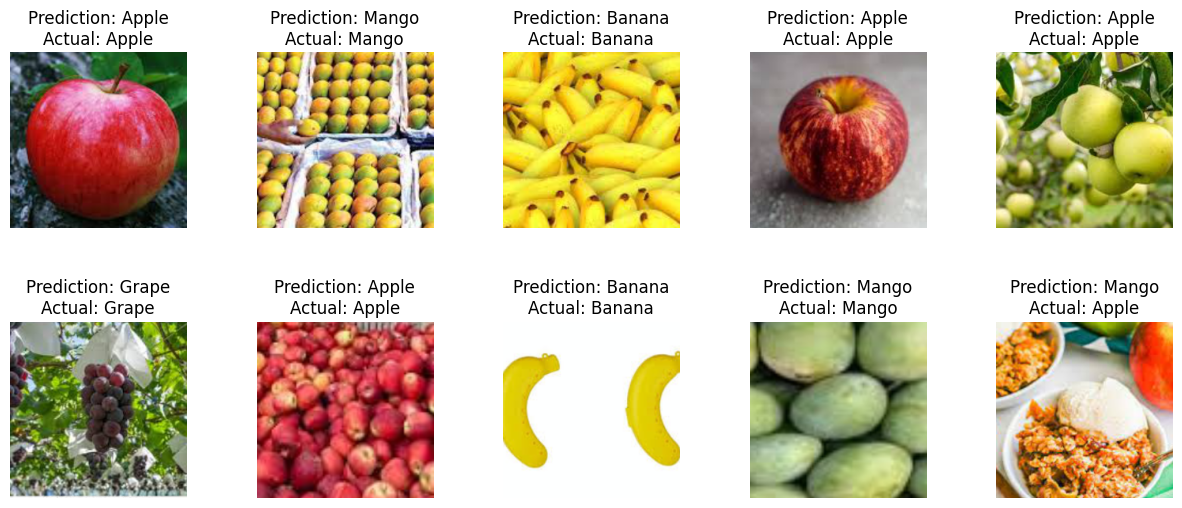

In [24]:
model.eval()

test_loader = dataloaders['test'] 
images, labels = next(iter(test_loader))  

indices = np.random.choice(len(images), size=10, replace=False)
images = images[indices]
labels = labels[indices]

images, labels = images.to(device), labels.to(device)

with torch.no_grad():
    outputs = model(images)
    _, predicted = torch.max(outputs, 1)

fig, axs = plt.subplots(2, 5, figsize=(15, 6))
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(2):
    for j in range(5):
        index = i * 5 + j
        image = images[index].cpu().numpy().transpose((1, 2, 0))
        mean = np.array([0.485, 0.456, 0.406])
        std = np.array([0.229, 0.224, 0.225])
        image = std * image + mean 
        image = np.clip(image, 0, 1)
        axs[i, j].imshow(image)
        axs[i, j].set_title(f'Prediction: {class_names[predicted[index]]}\nActual: {class_names[labels[index]]}')
        axs[i, j].axis('off')

plt.show()